In [ ]:
#hide
#all_ignoretest
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#hide
!pip install fastai -Uqq
!pip install einops

     |████████████████████████████████| 186 kB 4.9 MB/s 
     |████████████████████████████████| 56 kB 3.0 MB/s 


In [ ]:
#hide
%cd '/content/drive/MyDrive/colab_notebooks/hmckd'
!pip3 install -e . -q

/content/drive/MyDrive/colab_notebooks/hmckd
     |████████████████████████████████| 46 kB 1.8 MB/s 
     |████████████████████████████████| 61 kB 339 kB/s 
     |████████████████████████████████| 51 kB 212 kB/s 


In [ ]:
#hide
from hmckd.utils import get_features, baseline_df, med2como, get_tabpandas_dls
from hmckd.utils_tab import prepare_df_nsetpoints, prepare_df_firstnpoints
from hmckd.saint import SAINT
from hmckd.utils_saint import embed_data_mask, data_prep, get_saint_model, get_saint_nsp_dls, get_saint_fnp_dls, training_saint, test_saint

In [ ]:
#hide
from fastai.tabular.all import *
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Results

## n_setpoints Simple TabularModel

### 2_setpoints

In [ ]:
df = pd.read_csv('data/train_df_5f.csv')
features = get_features("data/dataScienceTask/")
df, cont_names = prepare_df_nsetpoints(features, df, 650, [200, 400])
procs = [Categorify, FillMissing, Normalize]
cat_names = ['race', 'gender']
y_names = 'Stage_Progress'

In [ ]:
train_df = df[df['fold']!= 4].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_2pt_{i}')])
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.747550,0.714788,0.400000,00:00
1,0.709544,0.709208,0.516667,00:00
2,0.666825,0.701765,0.566667,00:00
3,0.623010,0.716066,0.533333,00:00
4,0.580239,0.722279,0.566667,00:00
5,0.541681,0.744096,0.516667,00:00
6,0.510058,0.769161,0.566667,00:00
7,0.476030,0.771373,0.583333,00:00
8,0.455688,0.782164,0.583333,00:00
9,0.435709,0.791809,0.583333,00:00


Better model found at epoch 0 with accuracy value: 0.4000000059604645.
Better model found at epoch 1 with accuracy value: 0.5166666507720947.
Better model found at epoch 2 with accuracy value: 0.5666666626930237.
Better model found at epoch 7 with accuracy value: 0.5833333134651184.


epoch,train_loss,valid_loss,accuracy,time
0,0.739152,0.694239,0.566667,00:00
1,0.711972,0.686321,0.600000,00:00
2,0.664657,0.668843,0.600000,00:00
3,0.625107,0.639484,0.633333,00:00
4,0.579946,0.615349,0.683333,00:00
5,0.545594,0.615231,0.683333,00:00
6,0.508233,0.632116,0.683333,00:00
7,0.480415,0.654237,0.666667,00:00
8,0.457540,0.661523,0.650000,00:00
9,0.440544,0.665012,0.650000,00:00


Better model found at epoch 0 with accuracy value: 0.5666666626930237.
Better model found at epoch 1 with accuracy value: 0.6000000238418579.
Better model found at epoch 3 with accuracy value: 0.6333333253860474.
Better model found at epoch 4 with accuracy value: 0.6833333373069763.


epoch,train_loss,valid_loss,accuracy,time
0,0.782812,0.687415,0.566667,00:00
1,0.743307,0.680911,0.633333,00:00
2,0.685504,0.667255,0.650000,00:00
3,0.638364,0.646224,0.683333,00:00
4,0.605458,0.634673,0.650000,00:00
5,0.567605,0.625690,0.666667,00:00
6,0.536676,0.620353,0.650000,00:00
7,0.507411,0.620386,0.650000,00:00
8,0.482211,0.622034,0.650000,00:00
9,0.462892,0.623317,0.666667,00:00


Better model found at epoch 0 with accuracy value: 0.5666666626930237.
Better model found at epoch 1 with accuracy value: 0.6333333253860474.
Better model found at epoch 2 with accuracy value: 0.6499999761581421.
Better model found at epoch 3 with accuracy value: 0.6833333373069763.


epoch,train_loss,valid_loss,accuracy,time
0,0.747531,0.677041,0.633333,00:00
1,0.709847,0.663640,0.650000,00:00
2,0.671800,0.635704,0.683333,00:00
3,0.635915,0.606086,0.750000,00:00
4,0.597000,0.577386,0.700000,00:00
5,0.560284,0.559770,0.666667,00:00
6,0.528468,0.548638,0.700000,00:00
7,0.505250,0.548250,0.700000,00:00
8,0.480936,0.547034,0.700000,00:00
9,0.462246,0.544934,0.683333,00:00


Better model found at epoch 0 with accuracy value: 0.6333333253860474.
Better model found at epoch 1 with accuracy value: 0.6499999761581421.
Better model found at epoch 2 with accuracy value: 0.6833333373069763.
Better model found at epoch 3 with accuracy value: 0.75.


In [ ]:
#hide_output
test_dl = dls.test_dl(test_df)
preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_2pt_{i}')
    pred, y_pred, y_true = learn.get_preds(dl=test_dl, with_decoded=True)
    preds.append(pred)
  
y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.67
5-fold recall score: 0.60
5-fold precision score: 0.50


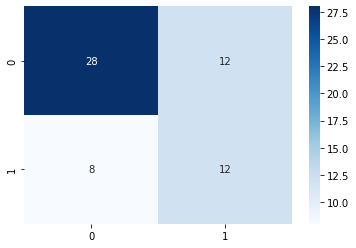

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

### 5_setpoints 

In [ ]:
df = pd.read_csv('data/train_df_5f.csv')
features = get_features("data/dataScienceTask/")
df, cont_names = prepare_df_nsetpoints(features, df, 650, [100, 200, 300, 400, 500])
procs = [Categorify, FillMissing, Normalize]
cat_names = ['race', 'gender']
y_names = 'Stage_Progress'

In [ ]:
train_df = df[df['fold']!= 4].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_5pt_{i}')])
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.734093,0.701319,0.516667,00:00
1,0.693535,0.691603,0.583333,00:00
2,0.656751,0.678942,0.566667,00:00
3,0.604457,0.669885,0.616667,00:00
4,0.557995,0.664688,0.600000,00:00
5,0.512392,0.675647,0.600000,00:00
6,0.481570,0.698680,0.616667,00:00
7,0.448379,0.710650,0.633333,00:00
8,0.419806,0.723157,0.633333,00:00
9,0.395438,0.726171,0.633333,00:00


Better model found at epoch 0 with accuracy value: 0.5166666507720947.
Better model found at epoch 1 with accuracy value: 0.5833333134651184.
Better model found at epoch 3 with accuracy value: 0.6166666746139526.
Better model found at epoch 7 with accuracy value: 0.6333333253860474.


epoch,train_loss,valid_loss,accuracy,time
0,0.709021,0.721731,0.366667,00:00
1,0.682048,0.713925,0.450000,00:00
2,0.637861,0.688651,0.583333,00:00
3,0.592292,0.669536,0.566667,00:00
4,0.551353,0.643320,0.600000,00:00
5,0.512723,0.625718,0.633333,00:00
6,0.489434,0.630450,0.650000,00:00
7,0.460211,0.630020,0.650000,00:00
8,0.439064,0.633547,0.650000,00:00
9,0.418921,0.633073,0.650000,00:00


Better model found at epoch 0 with accuracy value: 0.36666667461395264.
Better model found at epoch 1 with accuracy value: 0.44999998807907104.
Better model found at epoch 2 with accuracy value: 0.5833333134651184.
Better model found at epoch 4 with accuracy value: 0.6000000238418579.
Better model found at epoch 5 with accuracy value: 0.6333333253860474.
Better model found at epoch 6 with accuracy value: 0.6499999761581421.


epoch,train_loss,valid_loss,accuracy,time
0,0.755642,0.695978,0.450000,00:00
1,0.723608,0.665013,0.650000,00:00
2,0.689019,0.639343,0.700000,00:00
3,0.641374,0.616474,0.716667,00:00
4,0.592136,0.587979,0.716667,00:00
5,0.554617,0.582173,0.716667,00:00
6,0.516356,0.583183,0.700000,00:00
7,0.487062,0.585371,0.716667,00:00
8,0.463400,0.586449,0.716667,00:00
9,0.439412,0.586771,0.716667,00:00


Better model found at epoch 0 with accuracy value: 0.44999998807907104.
Better model found at epoch 1 with accuracy value: 0.6499999761581421.
Better model found at epoch 2 with accuracy value: 0.699999988079071.
Better model found at epoch 3 with accuracy value: 0.7166666388511658.


epoch,train_loss,valid_loss,accuracy,time
0,0.724143,0.684002,0.550000,00:00
1,0.711992,0.675274,0.616667,00:00
2,0.676385,0.645588,0.700000,00:00
3,0.635377,0.627443,0.733333,00:00
4,0.603159,0.592913,0.766667,00:00
5,0.565073,0.558632,0.750000,00:00
6,0.530480,0.539280,0.716667,00:00
7,0.503805,0.524698,0.716667,00:00
8,0.478318,0.519707,0.716667,00:00
9,0.456589,0.516327,0.716667,00:00


Better model found at epoch 0 with accuracy value: 0.550000011920929.
Better model found at epoch 1 with accuracy value: 0.6166666746139526.
Better model found at epoch 2 with accuracy value: 0.699999988079071.
Better model found at epoch 3 with accuracy value: 0.7333333492279053.
Better model found at epoch 4 with accuracy value: 0.7666666507720947.


In [ ]:
#hide_output
test_dl = dls.test_dl(test_df)
preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_5pt_{i}')
    pred, y_pred, y_true = learn.get_preds(dl=test_dl, with_decoded=True)
    preds.append(pred)
  
y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.67
5-fold recall score: 0.60
5-fold precision score: 0.50


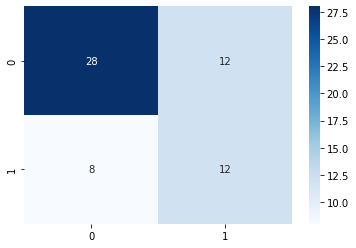

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

### 2_setpoints + meds

In [ ]:
meds = pd.read_csv('data/dataScienceTask/T_meds.csv')
meds = meds[meds['end_day'] < 650]
meddf = pd.DataFrame(columns=med2como.keys())
meddf['id'] = range(0,300)


for i in range(300):
    pat = meds[meds['id']==i]
    med = pd.DataFrame(columns=list(med2como.keys()))
    medstatus = {e:0 for e in pat['drug'].unique()}

    for drug in pat['drug'].unique():
        doses = pat[pat['drug']==drug]['daily_dosage'].values
        
        inidose = doses[0]
        change = 1
        
        for dose in doses[1:]:
            if dose>inidose:
                change = 2

        meddf.loc[i,drug] = change

meddf = meddf.fillna(0)
med_cat_cols = list(meddf.columns[:-1])

In [ ]:
df = pd.read_csv('data/train_df_5f.csv')
features = get_features("data/dataScienceTask/")
df, cont_names = prepare_df_nsetpoints(features, df, 650, [200, 400])
df = df.merge(meddf, on='id')
procs = [Categorify, FillMissing, Normalize]
cat_names = ['race', 'gender']+med_cat_cols
y_names = 'Stage_Progress'

In [ ]:
train_df = df[df['fold']!= 4].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)

for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_2pt_meds_{i}')])
    
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.836637,0.688406,0.550000,00:00
1,0.780200,0.682879,0.600000,00:00
2,0.703823,0.679355,0.600000,00:00
3,0.638623,0.669107,0.650000,00:00
4,0.583983,0.672785,0.600000,00:00
5,0.539938,0.694231,0.600000,00:00
6,0.497825,0.730227,0.566667,00:00
7,0.470302,0.766223,0.550000,00:00
8,0.444426,0.798887,0.533333,00:00
9,0.423818,0.833840,0.500000,00:00


Better model found at epoch 0 with accuracy value: 0.550000011920929.
Better model found at epoch 1 with accuracy value: 0.6000000238418579.
Better model found at epoch 3 with accuracy value: 0.6499999761581421.


epoch,train_loss,valid_loss,accuracy,time
0,0.762206,0.697271,0.416667,00:00
1,0.733112,0.678370,0.633333,00:00
2,0.685360,0.653049,0.716667,00:00
3,0.631665,0.631837,0.666667,00:00
4,0.585238,0.620233,0.683333,00:00
5,0.543744,0.595209,0.700000,00:00
6,0.510743,0.585011,0.700000,00:00
7,0.485080,0.580889,0.750000,00:00
8,0.460022,0.583897,0.766667,00:00
9,0.437888,0.583890,0.766667,00:00


Better model found at epoch 0 with accuracy value: 0.4166666567325592.
Better model found at epoch 1 with accuracy value: 0.6333333253860474.
Better model found at epoch 2 with accuracy value: 0.7166666388511658.
Better model found at epoch 7 with accuracy value: 0.75.
Better model found at epoch 8 with accuracy value: 0.7666666507720947.


epoch,train_loss,valid_loss,accuracy,time
0,0.761626,0.696275,0.400000,00:00
1,0.733266,0.689908,0.466667,00:00
2,0.687989,0.676797,0.600000,00:00
3,0.635839,0.647427,0.650000,00:00
4,0.597914,0.620706,0.650000,00:00
5,0.556993,0.612330,0.650000,00:00
6,0.520897,0.599200,0.666667,00:00
7,0.492349,0.595695,0.666667,00:00
8,0.465626,0.594747,0.666667,00:00
9,0.449983,0.594243,0.650000,00:00


Better model found at epoch 0 with accuracy value: 0.4000000059604645.
Better model found at epoch 1 with accuracy value: 0.46666666865348816.
Better model found at epoch 2 with accuracy value: 0.6000000238418579.
Better model found at epoch 3 with accuracy value: 0.6499999761581421.
Better model found at epoch 6 with accuracy value: 0.6666666865348816.


epoch,train_loss,valid_loss,accuracy,time
0,0.712583,0.662071,0.683333,00:00
1,0.691967,0.638084,0.683333,00:00
2,0.651807,0.610147,0.683333,00:00
3,0.615114,0.578436,0.700000,00:00
4,0.584635,0.560814,0.750000,00:00
5,0.548110,0.541522,0.750000,00:00
6,0.514144,0.525199,0.766667,00:00
7,0.486105,0.522102,0.750000,00:00
8,0.465389,0.525101,0.716667,00:00
9,0.446178,0.528400,0.700000,00:00


Better model found at epoch 0 with accuracy value: 0.6833333373069763.
Better model found at epoch 3 with accuracy value: 0.699999988079071.
Better model found at epoch 4 with accuracy value: 0.75.
Better model found at epoch 6 with accuracy value: 0.7666666507720947.


In [ ]:
categorical_dims = {o:len(i) for o,i in dls.train.categorify.classes.items()}
test_cats = dict(test_df[list(categorical_dims.keys())].nunique())
test_cats = {k:v+1 for k, v in test_cats.items()}

for k, v in categorical_dims.items():
    if test_cats[k] > v:
        print(f'{k}')


test_df = test_df[test_df['metoprolol'] != 2]
test_df = test_df[test_df['simvastatin'] != 2].reset_index(drop=True)

carvedilol
valsartan
metoprolol
propranolol


In [ ]:
test_dl = dls.test_dl(test_df)

preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_2pt_meds_{i}')
    pred, y_true = learn.get_preds(dl=test_dl)
    preds.append(pred)

y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.69
5-fold recall score: 0.58
5-fold precision score: 0.52


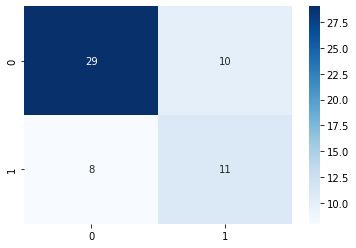

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

## first_n_points Simple TabularModel

### first_3_points

In [ ]:
#hide_input
df = pd.read_csv('data/train_df_5f.csv')
df, cont_names = prepare_df_firstnpoints(features, df, 3)
procs = [Categorify, FillMissing, Normalize]
y_names = 'Stage_Progress'
y_block = CategoryBlock()
cat_names = ['race', 'gender']

In [ ]:
#hide_output
train_df = df[df['fold']!= 4].reset_index(drop=True)
train_df = train_df[~train_df['id'].isin([281, 134, 7])].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)

for i in range(4):

    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_f3pt_{i}')])
    
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.799527,0.678449,0.600000,00:00
1,0.753005,0.670097,0.683333,00:00
2,0.694727,0.660523,0.616667,00:00
3,0.646097,0.659384,0.616667,00:00
4,0.598614,0.673812,0.616667,00:00
5,0.554539,0.672291,0.650000,00:00
6,0.523567,0.686068,0.666667,00:00
7,0.492348,0.698469,0.666667,00:00
8,0.465790,0.710015,0.650000,00:00
9,0.444890,0.719894,0.650000,00:00


Better model found at epoch 0 with accuracy value: 0.6000000238418579.
Better model found at epoch 1 with accuracy value: 0.6833333373069763.


epoch,train_loss,valid_loss,accuracy,time
0,0.712988,0.684085,0.566667,00:00
1,0.692329,0.670732,0.600000,00:00
2,0.654097,0.658222,0.583333,00:00
3,0.612403,0.650504,0.616667,00:00
4,0.574236,0.648404,0.633333,00:00
5,0.543639,0.654051,0.583333,00:00
6,0.515169,0.679656,0.650000,00:00
7,0.487601,0.693905,0.633333,00:00
8,0.466032,0.702533,0.616667,00:00
9,0.449617,0.723805,0.583333,00:00


Better model found at epoch 0 with accuracy value: 0.5666666626930237.
Better model found at epoch 1 with accuracy value: 0.6000000238418579.
Better model found at epoch 3 with accuracy value: 0.6166666746139526.
Better model found at epoch 4 with accuracy value: 0.6333333253860474.
Better model found at epoch 6 with accuracy value: 0.6499999761581421.


epoch,train_loss,valid_loss,accuracy,time
0,0.715797,0.703486,0.379310,00:00
1,0.687102,0.696782,0.448276,00:00
2,0.646838,0.668237,0.568965,00:00
3,0.619293,0.638569,0.655172,00:00
4,0.584387,0.617148,0.741379,00:00
5,0.551499,0.607426,0.775862,00:00
6,0.522622,0.602295,0.775862,00:00
7,0.496884,0.600274,0.775862,00:00
8,0.477877,0.601200,0.758621,00:00
9,0.461103,0.599395,0.758621,00:00


Better model found at epoch 0 with accuracy value: 0.37931033968925476.
Better model found at epoch 1 with accuracy value: 0.4482758641242981.
Better model found at epoch 2 with accuracy value: 0.568965494632721.
Better model found at epoch 3 with accuracy value: 0.6551724076271057.
Better model found at epoch 4 with accuracy value: 0.7413793206214905.
Better model found at epoch 5 with accuracy value: 0.7758620977401733.


epoch,train_loss,valid_loss,accuracy,time
0,0.762238,0.705182,0.355932,00:00
1,0.736939,0.690811,0.525424,00:00
2,0.696411,0.667374,0.661017,00:00
3,0.653121,0.648033,0.694915,00:00
4,0.610328,0.637537,0.762712,00:00
5,0.570266,0.629615,0.728814,00:00
6,0.539284,0.605640,0.762712,00:00
7,0.514233,0.592310,0.779661,00:00
8,0.495072,0.592834,0.728814,00:00
9,0.482800,0.589783,0.745763,00:00


Better model found at epoch 0 with accuracy value: 0.35593220591545105.
Better model found at epoch 1 with accuracy value: 0.5254237055778503.
Better model found at epoch 2 with accuracy value: 0.6610169410705566.
Better model found at epoch 3 with accuracy value: 0.694915235042572.
Better model found at epoch 4 with accuracy value: 0.7627118825912476.
Better model found at epoch 7 with accuracy value: 0.7796609997749329.


In [ ]:
#hide_output
test_df = test_df[~test_df['id'].isin([299,67,255])].reset_index(drop=True)
test_dl = dls.test_dl(test_df)
preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_f3pt_{i}')
    pred, y_pred = learn.get_preds(dl=test_dl)
    preds.append(pred)
  
y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.67
5-fold recall score: 0.60
5-fold precision score: 0.52


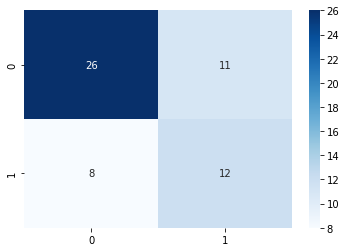

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

### first_6_points

In [ ]:
#hide_input
df = pd.read_csv('data/train_df_5f.csv')
df, cont_names = prepare_df_firstnpoints(features, df, 6)
procs = [Categorify, FillMissing, Normalize]
y_names = 'Stage_Progress'
y_block = CategoryBlock()
cat_names = ['race', 'gender']

In [ ]:
#hide_output
train_df = df[df['fold']!= 4].reset_index(drop=True)
train_df = train_df[~train_df['id'].isin([281, 134, 7])].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)

for i in range(4):

    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_f6pt_{i}')])
    
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.800181,0.731743,0.350000,00:00
1,0.762941,0.731005,0.316667,00:00
2,0.711578,0.715033,0.416667,00:00
3,0.656832,0.706105,0.516667,00:00
4,0.609056,0.708092,0.550000,00:00
5,0.560499,0.719421,0.533333,00:00
6,0.517478,0.719296,0.533333,00:00
7,0.481709,0.728763,0.533333,00:00
8,0.453953,0.743219,0.566667,00:00
9,0.432735,0.748583,0.583333,00:00


Better model found at epoch 0 with accuracy value: 0.3499999940395355.
Better model found at epoch 2 with accuracy value: 0.4166666567325592.
Better model found at epoch 3 with accuracy value: 0.5166666507720947.
Better model found at epoch 4 with accuracy value: 0.550000011920929.
Better model found at epoch 8 with accuracy value: 0.5666666626930237.
Better model found at epoch 9 with accuracy value: 0.5833333134651184.


epoch,train_loss,valid_loss,accuracy,time
0,0.835077,0.679900,0.633333,00:00
1,0.799832,0.672533,0.650000,00:00
2,0.707241,0.647872,0.600000,00:00
3,0.644682,0.621047,0.666667,00:00
4,0.584885,0.604277,0.616667,00:00
5,0.531761,0.596196,0.633333,00:00
6,0.482264,0.593356,0.633333,00:00
7,0.446504,0.596587,0.633333,00:00
8,0.414941,0.600079,0.650000,00:00
9,0.392908,0.603455,0.650000,00:00


Better model found at epoch 0 with accuracy value: 0.6333333253860474.
Better model found at epoch 1 with accuracy value: 0.6499999761581421.
Better model found at epoch 3 with accuracy value: 0.6666666865348816.


epoch,train_loss,valid_loss,accuracy,time
0,0.860087,0.743917,0.362069,00:00
1,0.809780,0.731798,0.379310,00:00
2,0.736865,0.715646,0.431034,00:00
3,0.684323,0.708742,0.500000,00:00
4,0.633930,0.711799,0.465517,00:00
5,0.587750,0.727423,0.551724,00:00
6,0.550107,0.753373,0.551724,00:00
7,0.513212,0.768812,0.603448,00:00
8,0.482986,0.784396,0.586207,00:00
9,0.459318,0.795660,0.603448,00:00


Better model found at epoch 0 with accuracy value: 0.36206895112991333.
Better model found at epoch 1 with accuracy value: 0.37931033968925476.
Better model found at epoch 2 with accuracy value: 0.43103447556495667.
Better model found at epoch 3 with accuracy value: 0.5.
Better model found at epoch 5 with accuracy value: 0.5517241358757019.
Better model found at epoch 7 with accuracy value: 0.6034482717514038.


epoch,train_loss,valid_loss,accuracy,time
0,0.746690,0.683848,0.593220,00:00
1,0.707852,0.669770,0.661017,00:00
2,0.654105,0.650138,0.694915,00:00
3,0.611790,0.621318,0.694915,00:00
4,0.557589,0.605700,0.677966,00:00
5,0.521189,0.593695,0.711864,00:00
6,0.489786,0.600109,0.694915,00:00
7,0.461010,0.611685,0.677966,00:00
8,0.437203,0.626042,0.677966,00:00
9,0.413879,0.629963,0.677966,00:00


Better model found at epoch 0 with accuracy value: 0.5932203531265259.
Better model found at epoch 1 with accuracy value: 0.6610169410705566.
Better model found at epoch 2 with accuracy value: 0.694915235042572.
Better model found at epoch 5 with accuracy value: 0.7118644118309021.


In [ ]:
#hide_output
test_df = test_df[~test_df['id'].isin([299,67,255])].reset_index(drop=True)
test_dl = dls.test_dl(test_df)
preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_f6pt_{i}')
    pred, y_pred = learn.get_preds(dl=test_dl)
    preds.append(pred)
  
y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.72
5-fold recall score: 0.60
5-fold precision score: 0.60


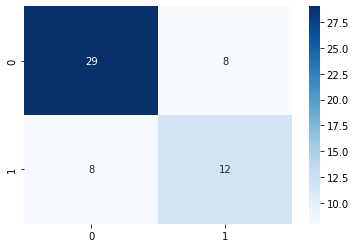

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

### first_3_points + meds

In [ ]:
#hide_input
df = pd.read_csv('data/train_df_5f.csv')
df, cont_names = prepare_df_firstnpoints(features, df, 3)
df = df.merge(meddf, on='id')
procs = [Categorify, FillMissing, Normalize]
cat_names = ['race', 'gender']+med_cat_cols
y_names = 'Stage_Progress'

In [ ]:
#hide_output
train_df = df[df['fold']!= 4].reset_index(drop=True)
train_df = train_df[~train_df['id'].isin([281, 134, 7])].reset_index(drop=True)
test_df = df[df['fold']== 4].reset_index(drop=True)

for i in range(4):

    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                            metrics=accuracy, 
                            cbs=[SaveModelCallback(monitor='accuracy', 
                                                   fname=f'tab_f3pt_meds_{i}')])
    
    learn.fit_one_cycle(10, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.802659,0.705207,0.350000,00:00
1,0.732809,0.678640,0.633333,00:00
2,0.666690,0.653209,0.633333,00:00
3,0.621132,0.631511,0.650000,00:00
4,0.576368,0.629162,0.633333,00:00
5,0.530402,0.654023,0.683333,00:00
6,0.489014,0.689165,0.666667,00:00
7,0.456687,0.729620,0.650000,00:00
8,0.431954,0.768298,0.650000,00:00
9,0.411478,0.794553,0.633333,00:00


Better model found at epoch 0 with accuracy value: 0.3499999940395355.
Better model found at epoch 1 with accuracy value: 0.6333333253860474.
Better model found at epoch 3 with accuracy value: 0.6499999761581421.
Better model found at epoch 5 with accuracy value: 0.6833333373069763.


epoch,train_loss,valid_loss,accuracy,time
0,0.774525,0.687897,0.616667,00:00
1,0.726357,0.681635,0.616667,00:00
2,0.671012,0.679649,0.600000,00:00
3,0.622365,0.670478,0.616667,00:00
4,0.575996,0.675335,0.650000,00:00
5,0.537529,0.677036,0.616667,00:00
6,0.499127,0.675717,0.600000,00:00
7,0.472567,0.691442,0.566667,00:00
8,0.446714,0.711872,0.550000,00:00
9,0.426537,0.719210,0.550000,00:00


Better model found at epoch 0 with accuracy value: 0.6166666746139526.
Better model found at epoch 4 with accuracy value: 0.6499999761581421.


epoch,train_loss,valid_loss,accuracy,time
0,0.886840,0.724567,0.327586,00:00
1,0.850111,0.713989,0.293103,00:00
2,0.781294,0.691180,0.551724,00:00
3,0.721465,0.664047,0.672414,00:00
4,0.669679,0.633008,0.724138,00:00
5,0.625492,0.612915,0.741379,00:00
6,0.586114,0.597176,0.758621,00:00
7,0.552280,0.587111,0.775862,00:00
8,0.525600,0.581598,0.775862,00:00
9,0.501930,0.576065,0.775862,00:00


Better model found at epoch 0 with accuracy value: 0.32758620381355286.
Better model found at epoch 2 with accuracy value: 0.5517241358757019.
Better model found at epoch 3 with accuracy value: 0.6724137663841248.
Better model found at epoch 4 with accuracy value: 0.7241379022598267.
Better model found at epoch 5 with accuracy value: 0.7413793206214905.
Better model found at epoch 6 with accuracy value: 0.7586206793785095.
Better model found at epoch 7 with accuracy value: 0.7758620977401733.


epoch,train_loss,valid_loss,accuracy,time
0,0.691772,0.673605,0.661017,00:00
1,0.672560,0.663970,0.644068,00:00
2,0.645115,0.644664,0.627119,00:00
3,0.606003,0.634567,0.677966,00:00
4,0.578103,0.617501,0.677966,00:00
5,0.539713,0.598838,0.711864,00:00
6,0.512794,0.596975,0.728814,00:00
7,0.487732,0.602292,0.745763,00:00
8,0.471275,0.609925,0.745763,00:00
9,0.456656,0.612596,0.745763,00:00


Better model found at epoch 0 with accuracy value: 0.6610169410705566.
Better model found at epoch 3 with accuracy value: 0.6779661178588867.
Better model found at epoch 5 with accuracy value: 0.7118644118309021.
Better model found at epoch 6 with accuracy value: 0.7288135886192322.
Better model found at epoch 7 with accuracy value: 0.7457627058029175.


In [ ]:
test_df = test_df[test_df['metoprolol'] != 2]
test_df = test_df[test_df['simvastatin'] != 2].reset_index(drop=True)

In [ ]:
#hide_output
test_df = test_df[~test_df['id'].isin([299,67,255])].reset_index(drop=True)
test_dl = dls.test_dl(test_df)
preds = []
for i in range(4):
    dls, tabdf = get_tabpandas_dls(i, train_df, procs, cat_names, cont_names, y_names, 32)
    emb_szs = get_emb_sz(tabdf)
    learn = tabular_learner(dls, [100,50], 
                        metrics=accuracy, 
                        cbs=[SaveModelCallback(monitor='accuracy')])
    
    learn.load(f'tab_f3pt_meds_{i}')
    pred, y_pred = learn.get_preds(dl=test_dl)
    preds.append(pred)
  
y_true = test_dl.y.values
y_pred = np.array(torch.argmax(torch.stack(preds).mean(0),1))

/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


/usr/local/lib/python3.7/dist-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
#hide
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.69
5-fold recall score: 0.53
5-fold precision score: 0.56


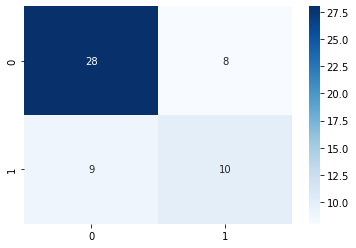

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

## n_setpoints SAINT TabularModel

### 2_setpoints 

In [ ]:
config = {'cont_embeddings':'MLP',
          'embedding_size':32,
          'transformer_depth':1,
          'attention_heads':8,
          'attention_dropout':0.1,
          'ff_dropout':0.8,
          'attentiontype':'colrow',
          'lr':0.0001,
          'pretrain_epochs':30,
          'epochs':15,
          'batchsize':256,
          'pt_tasks':['contrastive','denoising'],
          'pt_aug':['mixup', 'cutmix',],
          'pt_aug_lam':0.1,
          'mixup_lam':0.3,
          'train_mask_prob':0,
          'mask_prob':0,
          'pt_projhead_style':'diff',
          'nce_temp':0.7,
          'lam0':0.5,
          'lam1':10,
          'lam2':1,
          'lam3':10,
          'final_mlp_style':'sep'}

mask_params = {'mask_prob':config['train_mask_prob'],
               'avail_train_y': 0,
               'test_mask':config['train_mask_prob']}

pt_mask_params = {'mask_prob':0,
                  'avail_train_y':0,
                  'test_mask':0}

In [ ]:
#hide_output
df = pd.read_csv('data/train_df_5f.csv')

train_df = df[df['fold'] != 4].reset_index(drop=True)
test_df = df[df['fold'] == 4].reset_index(drop=True)
device = 'cpu'
y_dim = 2

for i in range(4):
    print(f'____________________Fold: {i}_______________________')
    dls, test_dl, tabdf, cat_dims, num_continuous, continuous_mean_std, y_dim = get_saint_nsp_dls(i, train_df, test_df, 200, 400, 650, 32)
    model = get_saint_model(config, cat_dims, num_continuous, continuous_mean_std, y_dim)
    output_fn =f'models/saint_2pt_{i}.pth'
    training_saint(dls, model, config, cat_dims, output_fn, 'nspt')

____________________Fold: 0_______________________
Found new best model with accuracy of 66.66667175292969 : Epoch 0
Epoch: 0, Train Loss: 0.6470, Valid Loss: 0.6362, Valid Acc: 66.67
Epoch: 1, Train Loss: 0.6309, Valid Loss: 0.6248, Valid Acc: 66.67
Epoch: 2, Train Loss: 0.6166, Valid Loss: 0.6232, Valid Acc: 66.67
Epoch: 3, Train Loss: 0.5966, Valid Loss: 0.6182, Valid Acc: 66.67
Epoch: 4, Train Loss: 0.5669, Valid Loss: 0.6199, Valid Acc: 66.67
Epoch: 5, Train Loss: 0.5730, Valid Loss: 0.6260, Valid Acc: 63.33
Epoch: 6, Train Loss: 0.5500, Valid Loss: 0.6381, Valid Acc: 65.00
Epoch: 7, Train Loss: 0.5492, Valid Loss: 0.6445, Valid Acc: 63.33
Epoch: 8, Train Loss: 0.5141, Valid Loss: 0.6632, Valid Acc: 56.67
Epoch: 9, Train Loss: 0.4994, Valid Loss: 0.6600, Valid Acc: 66.67
Epoch: 10, Train Loss: 0.4736, Valid Loss: 0.6639, Valid Acc: 63.33
Epoch: 11, Train Loss: 0.4260, Valid Loss: 0.6698, Valid Acc: 61.67
Epoch: 12, Train Loss: 0.4102, Valid Loss: 0.6844, Valid Acc: 65.00
Epoch: 13

In [ ]:
#hide_output
y_preds = []
for i in range(4):
    dls, test_dl, tabdf, cat_dims, num_continuous, continuous_mean_std, y_dim = get_saint_nsp_dls(i, train_df, test_df, 200, 400, 650, 32)
    model = get_saint_model(config, cat_dims, num_continuous, continuous_mean_std, y_dim)
    model.load_state_dict(torch.load(f'models/saint_2pt_{i}.pth'))

    y_true, y_pred = test_saint(test_dl, model, 'nspt')
    y_preds.append(y_pred)

In [ ]:
#hide
y_pred = torch.argmax(torch.stack(y_preds).mean(0), 1)
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.68
5-fold recall score: 0.25
5-fold precision score: 0.56


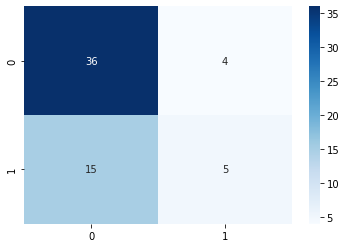

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

### first_3_points

In [ ]:
#hide_output
df = pd.read_csv('data/train_df_5f.csv')

train_df = df[df['fold'] != 4].reset_index(drop=True)
test_df = df[df['fold'] == 4].reset_index(drop=True)
device = 'cpu'
y_dim = 2

for i in range(4):
    print(f'____________________Fold: {i}_______________________')
    dls, test_dl, tabdf, cat_dims, num_continuous, continuous_mean_std, y_dim = get_saint_nsp_dls(i, train_df, test_df, 200, 400, 650, 32)
    model = get_saint_model(config, cat_dims, num_continuous, continuous_mean_std, y_dim)
    output_fn =f'models/saint_f3pt_{i}.pth'
    training_saint(dls, model, config, cat_dims, output_fn, 'fnpt')

____________________Fold: 0_______________________
Found new best model with accuracy of 66.66667175292969 : Epoch 0
Epoch: 0, Train Loss: 0.6734, Valid Loss: 0.6402, Valid Acc: 66.67
Epoch: 1, Train Loss: 0.6476, Valid Loss: 0.6289, Valid Acc: 66.67
Epoch: 2, Train Loss: 0.6209, Valid Loss: 0.6322, Valid Acc: 66.67
Epoch: 3, Train Loss: 0.6149, Valid Loss: 0.6240, Valid Acc: 66.67
Epoch: 4, Train Loss: 0.5753, Valid Loss: 0.6275, Valid Acc: 66.67
Epoch: 5, Train Loss: 0.5676, Valid Loss: 0.6245, Valid Acc: 66.67
Epoch: 6, Train Loss: 0.5730, Valid Loss: 0.6393, Valid Acc: 61.67
Epoch: 7, Train Loss: 0.5606, Valid Loss: 0.6337, Valid Acc: 61.67
Epoch: 8, Train Loss: 0.4914, Valid Loss: 0.6458, Valid Acc: 60.00
Epoch: 9, Train Loss: 0.5059, Valid Loss: 0.6499, Valid Acc: 63.33
Epoch: 10, Train Loss: 0.5228, Valid Loss: 0.6735, Valid Acc: 58.33
Epoch: 11, Train Loss: 0.4791, Valid Loss: 0.6584, Valid Acc: 63.33
Epoch: 12, Train Loss: 0.4628, Valid Loss: 0.6691, Valid Acc: 63.33
Epoch: 13

In [ ]:
#hide_output
y_preds = []
for i in range(4):
    dls, test_dl, tabdf, cat_dims, num_continuous, continuous_mean_std, y_dim = get_saint_nsp_dls(i, train_df, test_df, 200, 400, 650, 32)
    model = get_saint_model(config, cat_dims, num_continuous, continuous_mean_std, y_dim)
    model.load_state_dict(torch.load(f'models/saint_f3pt_{i}.pth'))

    y_true, y_pred = test_saint(test_dl, model, 'fnpt')
    y_preds.append(y_pred)

In [ ]:
#hide
y_pred = torch.argmax(torch.stack(y_preds).mean(0), 1)
print(f'5-fold accuracy score: {accuracy_score(y_true, y_pred):.2f}')
print(f'5-fold recall score: {recall_score(y_true, y_pred):.2f}')
print(f'5-fold precision score: {precision_score(y_true, y_pred):.2f}')

5-fold accuracy score: 0.68
5-fold recall score: 0.30
5-fold precision score: 0.55


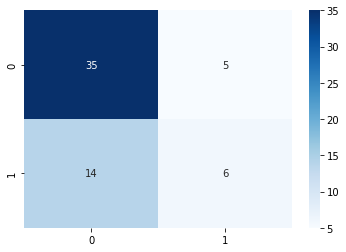

In [ ]:
#hide_input
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')